# 製造數據科學 作業一

### 第一題

In [1]:
!pip install pandas numpy scikit-learn
!pip  install openpyxl
!pip install seaborn


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [20]:
#Load the dataset 
data = pd.read_excel('MDS_Assignment1_winequality.xlsx')

X = data.drop('quality', axis=1)  
y = data['quality']  

#Add a constant term to the input variables 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          1.79e-145
Time:                        10:26:36   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

(a)  

| 變數名稱 | estimate |  std. error  | t value  | p value |
|------|-------:|-------:|-------:|-------:|
|Intercept|21.9652|21.195|1.036|0.3000|
|fixed acidity |0.0250|0.026|0.963|0.336|
|volatile acidity|-1.0836| 0.121|-8.948|0.000|
|citric acid|-0.1826|0.147|-1.240|0.215|
|residual sugar|0.0163|0.015|1.089 |0.276|
|chlorides|-1.8742|0.419|-4.470|0.000|
|free sulfur dioxide|0.0044|0.002|2.009|0.045|
|total sulfur dioxide|-0.0033|0.001|-4.480|0.000|
|density|-17.8812|21.633 |-0.827|0.409|
|pH|-0.4137|0.192|-2.159|0.031|
|sulphates|0.9163|0.114|8.014 | 0.000|
  
 R-squared: 0.361   Adj. R-squared: 0.356


(b)  
Since R-squared is only 0.361 and Adj. R-squared is only 0.356, the fitting isn't a good idea.  
Because the model including too many features which p-value is lower than 0.05.

(c)  
| 變數名稱 | 排名 |
|------|-------:|
|volatile acidity|1|
|sulphates|2|
|total sulfur dioxide|3|
|chlorides|4|

The above four features are significant variables with p values<0.01.

(d)

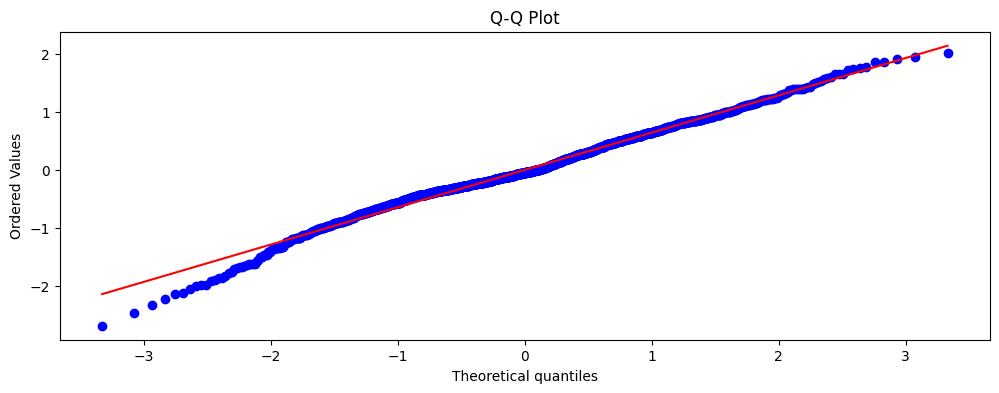

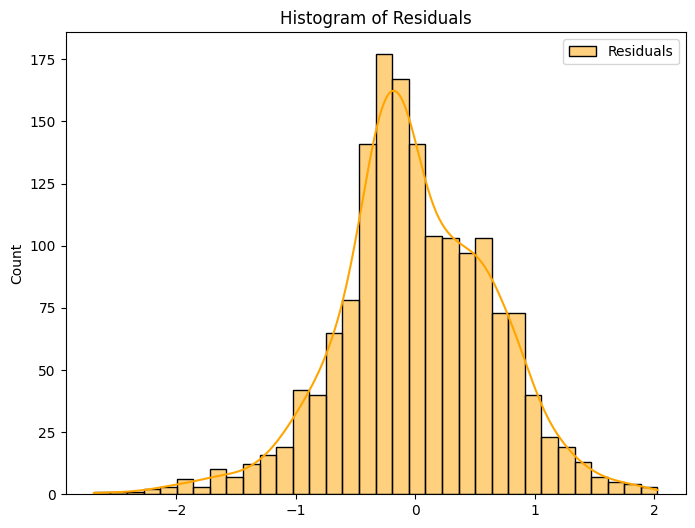

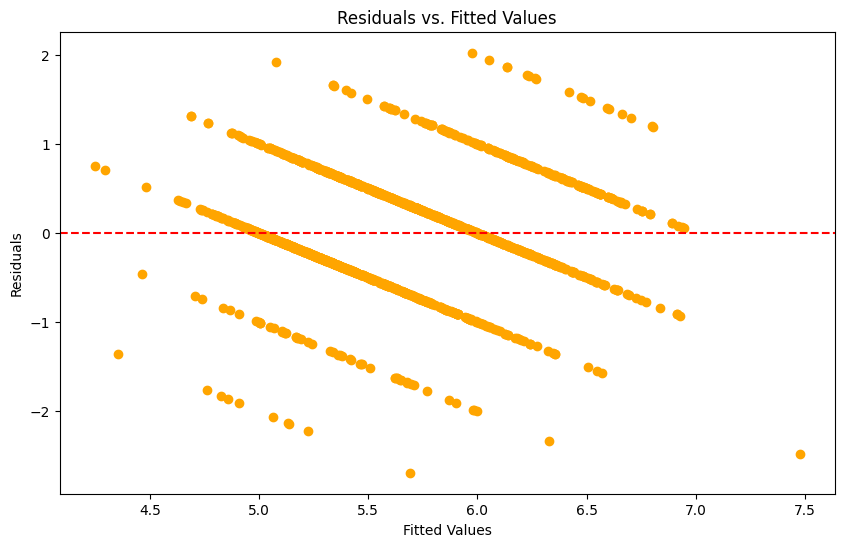

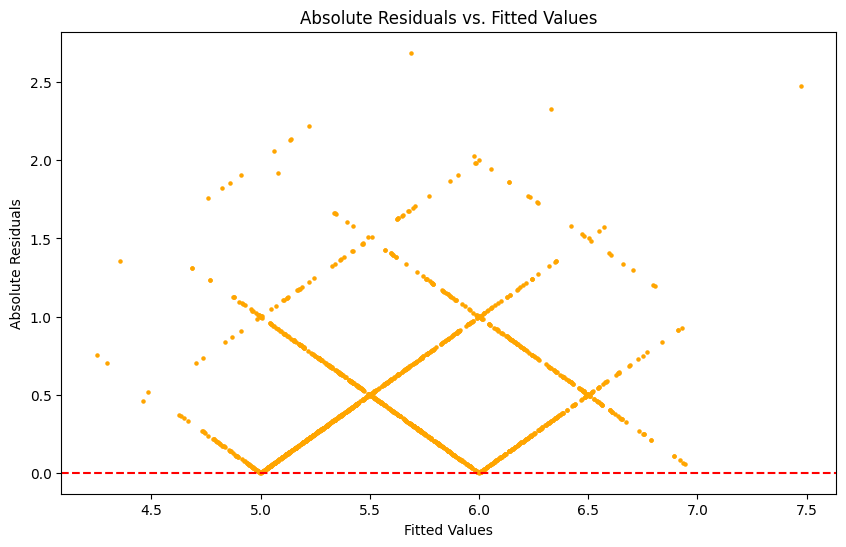

In [36]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


residuals = model.resid

# (1) Normality Assumption
# Check for normality of residuals using a Q-Q plot and a histogram
plt.figure(figsize=(12, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="orange", label="Residuals")

plt.title('Histogram of Residuals')
plt.legend()
plt.show()

# (2) Independence Assumption
# Check for independence of residuals using a plot of residuals vs. fitted values 
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals,color = "orange")
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# (3) Homogeneity of Variance Assumption
# Check for homogeneity of variance using a plot of residuals vs. fitted values 
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, abs(residuals),color = "orange",s=5)
plt.xlabel('Fitted Values')
plt.ylabel('Absolute Residuals')
plt.title('Absolute Residuals vs. Fitted Values')
plt.axhline(y=0, color = "r", linestyle='--')
plt.show()


(1)It can be concluded from the pitcures of Q-Q plot & Histogram of Residuals that the residuals follow the pattern of normality.  
(2)The independence between residuals and fitted value is violated, since in the graph there exists a linear pattern.  
(3)The Homogeneity of Variance with respect to residual is violated, since in the last graph there exists a pattern that the variance of some fitted value around 5.5 is smaller than the variance of some fitted value around 5&6.

### 第二題

In [2]:
!pip install mlxtend


(a)

In [18]:
# only include the spanish data and extract the first 2 columns  
data = pd.read_excel('MDS_Assignment1_OnlineRetail.xlsx')
data = (data[data['Country']=="Spain"])
df = data.iloc[:, :2]
df = df.groupby('InvoiceNo')['StockCode'].agg(list).reset_index()

df

,InvoiceNo,StockCode
0,536944,"[22383, 22384, 20727, 20725, 20728]"
1,538095,"[22504, 22212, 22953, 84818, 21114, 84692, 227..."
2,538525,"[84347, 21164, 21506, 22023, 22819, 21519, 220..."
3,539351,"[85099C, 85099B, 22386, 21928, 20712, 20716, 2..."
4,540469,"[POST, 22814, 21500, 22045, 22711, 22047, 8425..."
...,...,...
100,C569422,[20979]
101,C571499,"[82494L, 82486, 82483, 82482, 72802C, 72802B, ..."
102,C574894,"[23236, 22071, 20914, 21843, 22553, 22554, 236..."
103,C575531,[22960]


In [19]:
# 進行One-Hot Encoding轉換，並將可能NaN之值轉換為0
one_hot_encoded = pd.get_dummies(df['StockCode'].explode(), prefix='StockCode').max(level=0)
one_hot_encoded.astype(int)
result_df = pd.concat([df['InvoiceNo'], one_hot_encoded], axis=1)
result_df.fillna(0, inplace=True)
result_df

# include the top 100 features
feature_counts = one_hot_encoded.sum()
top_100_features = feature_counts.nlargest(100).index
one_hot_encoded_top_100 = one_hot_encoded[top_100_features]
result_df = pd.concat([df['InvoiceNo'], one_hot_encoded_top_100], axis=1)
result_df.fillna(0, inplace=True)
result_df

C:\Users\User\AppData\Local\Temp\ipykernel_748\665810068.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  one_hot_encoded = pd.get_dummies(df['StockCode'].explode(), prefix='StockCode').max(level=0)


,InvoiceNo,StockCode_POST,StockCode_22423,StockCode_22960,StockCode_22077,StockCode_22326,StockCode_22629,StockCode_84879,StockCode_21212,StockCode_21340,...,StockCode_22845,StockCode_22848,StockCode_22890,StockCode_22961,StockCode_22968,StockCode_23076,StockCode_23209,StockCode_23240,StockCode_23266,StockCode_37495
0,536944,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538095,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,538525,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,539351,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,540469,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,C569422,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,C571499,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,C574894,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,C575531,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(b)  
由於記憶體空間不足，僅取出西班牙的資料、將變數取出最常出現的100個，並將support提高

In [30]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import scipy.sparse as sp



# Assuming you have prepared your DataFrame 'result_df' with the first column as 'InvoiceNo'
# and the rest of the columns are one-hot encoded StockCodes

# Drop the 'InvoiceNo' column
basket_df = result_df.drop(columns=['InvoiceNo'])


# Randomly sample a subset of rows to reduce memory usage
#sample_size = 2000
#if sample_size < len(basket_df):
    #basket_df = basket_df.sample(sample_size, random_state=42)
#print(basket_df.shape)

# Define the minimum support and confidence thresholds
min_support = 0.05
min_confidence = 0.6


# Find frequent itemsets using Apriori with sparse data
frequent_itemsets = apriori(basket_df, min_support=min_support, use_colnames=True)
frequent_itemsets


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.590476,(StockCode_POST)
1,0.238095,(StockCode_22423)
2,0.152381,(StockCode_22960)
3,0.142857,(StockCode_22077)
4,0.114286,(StockCode_22326)
...,...,...
106,0.057143,"(StockCode_22077, StockCode_22553, StockCode_P..."
107,0.057143,"(StockCode_84879, StockCode_21212, StockCode_P..."
108,0.057143,"(StockCode_22745, StockCode_22748, StockCode_P..."
109,0.057143,"(StockCode_22077, StockCode_84879, StockCode_2..."


In [33]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_confidence)
top_10_rules = rules.sort_values(by="lift", ascending=False).head(10)
top_10_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
111,(StockCode_22745),"(StockCode_POST, StockCode_22748)",0.057143,0.750000,13.125000
80,(StockCode_22745),(StockCode_22748),0.066667,0.875000,13.125000
81,(StockCode_22748),(StockCode_22745),0.066667,1.000000,13.125000
110,"(StockCode_POST, StockCode_22748)",(StockCode_22745),0.057143,1.000000,13.125000
109,"(StockCode_22745, StockCode_POST)",(StockCode_22748),0.057143,0.857143,12.857143
112,(StockCode_22748),"(StockCode_22745, StockCode_POST)",0.057143,0.857143,12.857143
83,(StockCode_21122),(StockCode_21126),0.057143,0.857143,12.857143
82,(StockCode_21126),(StockCode_21122),0.057143,0.857143,12.857143
77,(StockCode_22699),(StockCode_22697),0.057143,0.545455,9.545455
128,"(StockCode_84879, StockCode_POST)","(StockCode_22077, StockCode_21212)",0.057143,0.545455,9.545455


(c)  

In [56]:

description1 = data[data['StockCode'] == 22745]['Description'].values[0]
description2 = data[data['StockCode'] == 22748]['Description'].values[0]
description3 = data[data['StockCode'] == "POST"]['Description'].values[0]

print(description1,description2,description3)

POPPY'S PLAYHOUSE BEDROOM  POPPY'S PLAYHOUSE KITCHEN POSTAGE


According to coffidence of StockCode_22745 and StockCode_22748 equals 1, we can conclude that people who bought POPPY'S PLAYHOUSE KITCHEN also bought POPPY'S PLAYHOUSE BEDROOM, In addition, with its high lift futher makes the assosiation rules of this two stuff more strong.  We can also think about the two stuff's properties, since both are related to the playhouse, customers may buy both of them to satisfy the kids.

(d)


In [49]:
import matplotlib.pyplot as plt
import networkx as nx

Text(0, 0.5, 'lift')

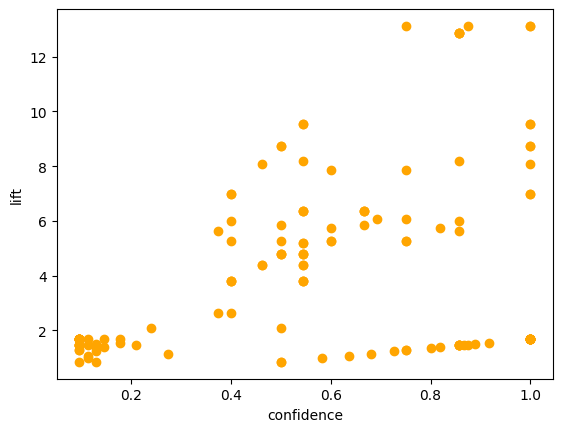

In [46]:
plt.scatter(rules["confidence"],rules["lift"],color='orange')
plt.xlabel("confidence")
plt.ylabel("lift")

We can observed from the above graph that a point(stock code 22748 & 22745) has the largest lift and confidence = 1.

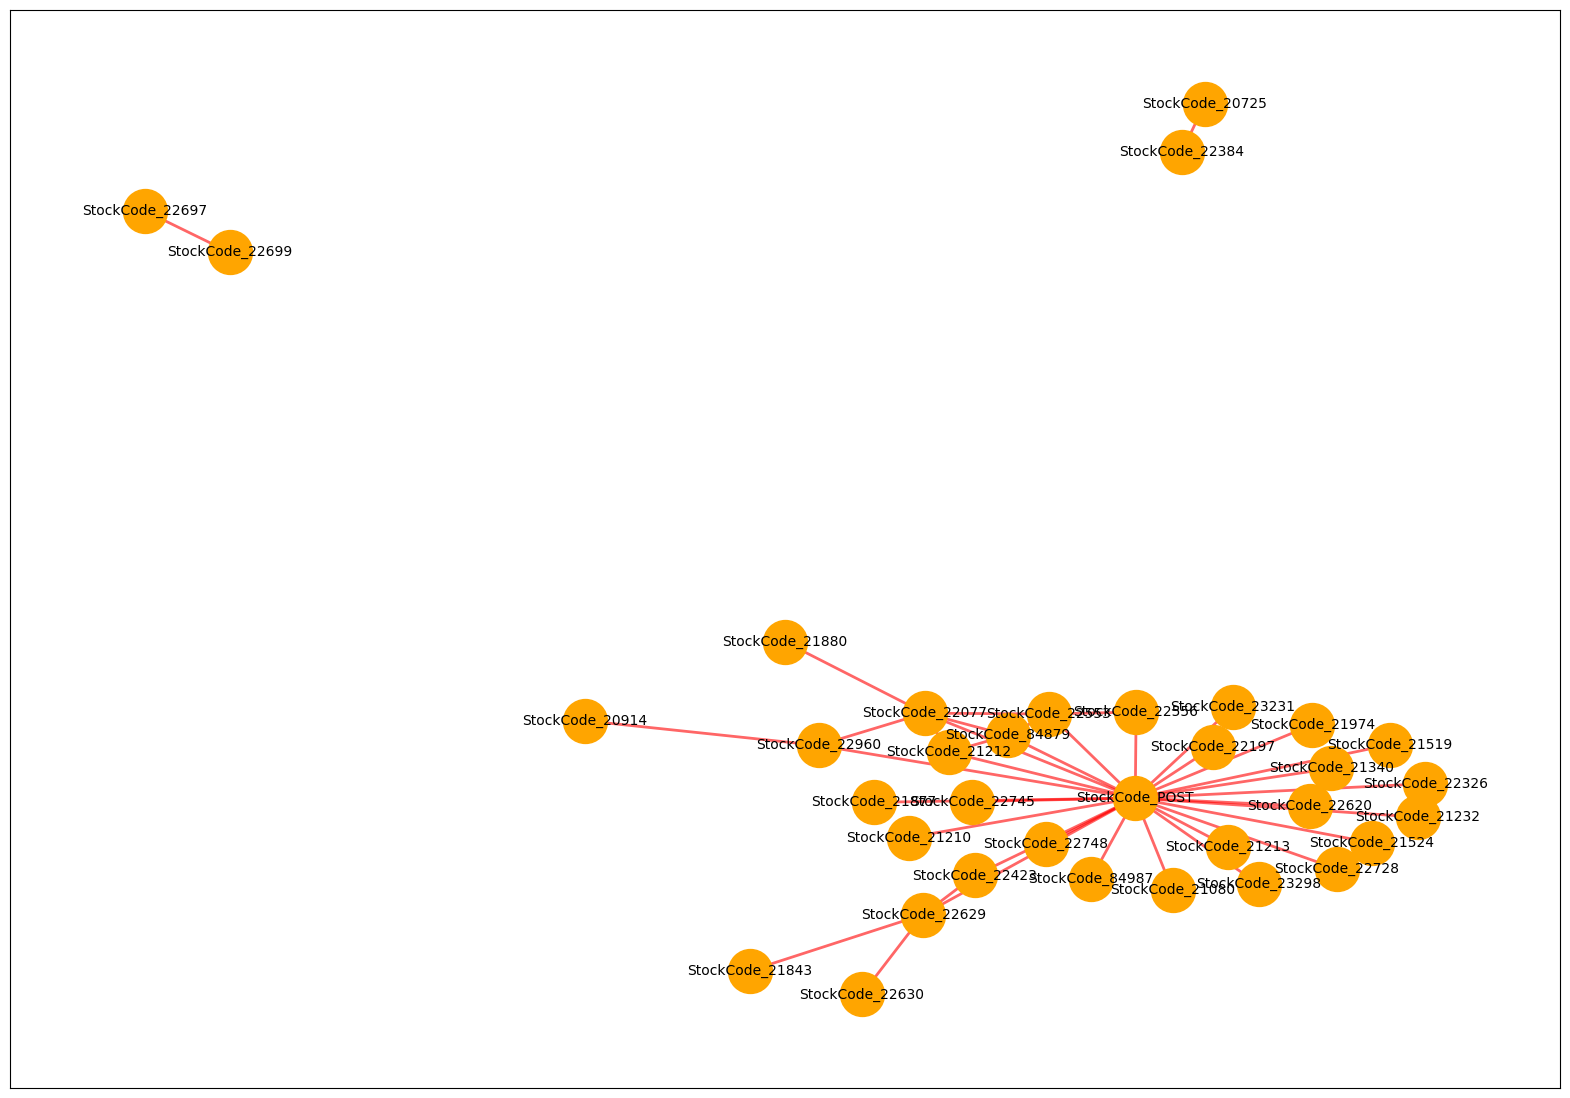

In [64]:
# 繪製lift前80名的網狀圖
net_rules = rules.copy()
net_rules["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
net_rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
fig, ax=plt.subplots(figsize=(20,14))

GA=nx.from_pandas_edgelist(net_rules.head(80),source='antecedents',target='consequents')
pos = nx.spring_layout(GA)
nx.draw_networkx_nodes(GA, pos, node_size = 1000, node_color = "orange")
nx.draw_networkx_edges(GA, pos, width = 2, alpha = 0.6, edge_color = 'red')
nx.draw_networkx_labels(GA, pos, font_size = 10, font_family = 'sans-serif')
plt.show()

### 第三題


(a)

| 工作站編號 | 平行等效機台  | 加工時間(hr)  | 工作站產能 TH |
|------|-------:|-------:|-------:|
|1|5|7|5/7|
|2|2|3|2/3|
|3|6|15|2/5|
|4|3|5|3/5|  
  
  
由上表可以得知瓶頸站為3號工作站，其產出率為0.4個/每小時，最小生產週期時間為30小時，關鍵在製品水準為兩者相乘=12。


(b)

Case1: WIP<=12  
最大的產出率=WIP/30
最小生產週期時間=30hr  
  
Case2: WIP>12  
最大的產出率=0.4
最小生產週期時間=WIP/0.4hr  

(C)

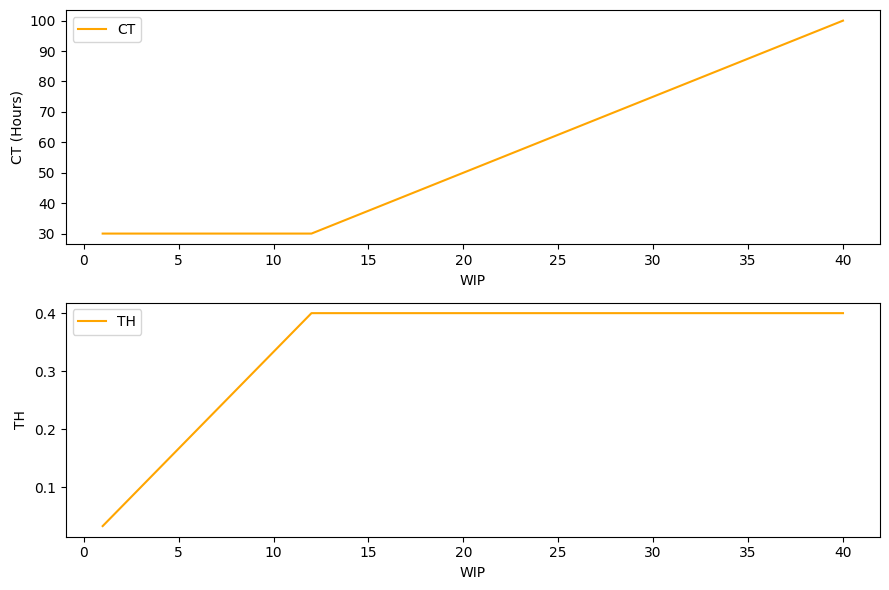

In [10]:
import numpy as np
import matplotlib.pyplot as plt

time_steps = 40
wip_values = np.arange(1, time_steps + 1)  

ct_values = []
th_values = []

for wip in wip_values:
    if wip <= 12:
        # Case 1: WIP <= 12
        th = wip / 30  
        ct = 30 
    else:
        # Case 2: WIP > 12
        th = 0.4  
        ct = wip / 0.4  
    ct_values.append(ct)
    th_values.append(th)


plt.figure(figsize=(9, 6))

plt.subplot(2, 1, 1)
plt.plot(wip_values, ct_values, label='CT', color = "orange")
plt.xlabel('WIP')
plt.ylabel('CT (Hours)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(wip_values, th_values, label='TH',color = "orange")
plt.xlabel('WIP')
plt.ylabel('TH')
plt.legend()

plt.tight_layout()
plt.show()
